## Lab5 Pandas

Key takeaways:
- What is pandas?
- Series vs DataFrame
- Build Dataframe or Import dataset to be DataFrame form
- Dataframe slicing
- Other stuff (To be introduced in next lecture)

Pandas is a package for data manipulation. 

Documentation: https://pandas.pydata.org/pandas-docs/stable/index.html

• The very start for data visualization

• Machine learning in Python

Little tips:
    
    Before starting your work, do some exploration on dataset. For example, look at the top 5 rows, check the shape, columns, info, mean, etc,.

### Series VS DataFrames

In [153]:
#Series
import pandas as pd
import numpy as np
data = np.array(['a','b','c','d','e'])
s = pd.Series(data)
print(s)

0    a
1    b
2    c
3    d
4    e
dtype: object


In [152]:
s2 = pd.Series(['a','b','c','d','e'],index = ['A','B','C','D','E'])
s2

A    a
B    b
C    c
D    d
E    e
dtype: object

- Series：

A pandas series is a one-dimensional data structure that comprises of a key-value pair. It is similar to a python dictionary, except it provides more freedom to manipulate and edit the data.

- DataFrame:

A pandas dataframe is a two-dimensional data-structure that can be thought of as a spreadsheet. A dataframe can also be thought of as a combination of two or more series.



### Build dataframes

In [2]:
import pandas as pd

Different ways to construct dataframe:

https://www.tutorialspoint.com/python_pandas/python_pandas_quick_guide.htm

In [29]:
#Create a DataFrame from Dict of ndarrays / Lists

In [150]:
data2 = {'Name':['Tom', 'Jack', 'Steve', 'Ricky'],'Age':[28,34,29,42]}
data2

{'Name': ['Tom', 'Jack', 'Steve', 'Ricky'], 'Age': [28, 34, 29, 42]}

In [151]:
df2 = pd.DataFrame(data2)
df2

,Name,Age
0,Tom,28
1,Jack,34
2,Steve,29
3,Ricky,42


### Import data and read in as a dataframe

In [31]:
#Instead of creating df and format its data, directly import csv/json/xlsx/... files

In [ ]:
#The bitcoin example

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
from matplotlib import cm
import seaborn as sns

In [113]:
#Where to find the corresponding file?
data = pd.read_csv('BitCoin.csv') #the path depends on where you put the file
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
data.shape

(4857377, 8)

In [123]:
data = data.dropna(axis=0)
#Or you can fill all the nan with certain value

In [116]:
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [122]:
data.info

<bound method DataFrame.info of           Timestamp      Open      High       Low     Close  Volume_(BTC)  \
0        1325317920      4.39      4.39      4.39      4.39      0.455581   
478      1325346600      4.39      4.39      4.39      4.39     48.000000   
547      1325350740      4.50      4.57      4.50      4.57     37.862297   
548      1325350800      4.58      4.58      4.58      4.58      9.000000   
1224     1325391360      4.58      4.58      4.58      4.58      1.502000   
...             ...       ...       ...       ...       ...           ...   
4857372  1617148560  58714.31  58714.31  58686.00  58686.00      1.384487   
4857373  1617148620  58683.97  58693.43  58683.97  58685.81      7.294848   
4857374  1617148680  58693.43  58723.84  58693.43  58723.84      1.705682   
4857375  1617148740  58742.18  58770.38  58742.18  58760.59      0.720415   
4857376  1617148800  58767.75  58778.18  58755.97  58778.18      2.712831   

         Volume_(Currency)  Weighted_Price 

In [117]:
data.shape

(3613769, 8)

In [86]:
data = data[['Timestamp','Close','Volume_(BTC)']]
data['Timestamp'] = pd.to_datetime(data['Timestamp'],unit='s')
data = data.dropna()
data = data.set_index('Timestamp')
data = data.resample('MS').mean()

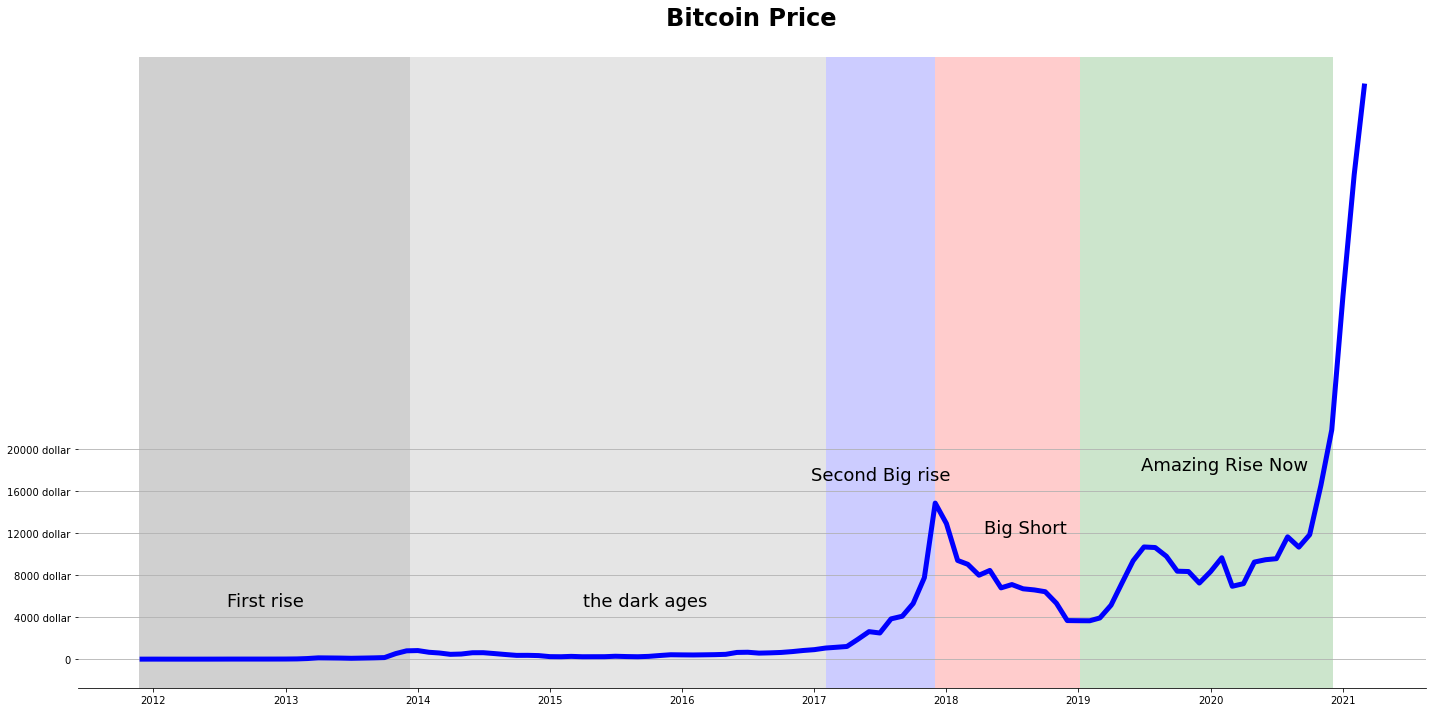

In [87]:
fig, ax = plt.subplots(figsize=(20, 10), facecolor="w")

ax.plot(data['Close'], color = 'blue', lw=5)

for s in ["left", "right", "top"]:
    ax.spines[s].set_visible(False)

yticks = list(np.linspace(0, 20000, 6))
ax.set_yticks(yticks)
ax.set_yticklabels([f"{int(y)} dollar" if y > 0 else "0" for y in yticks])

ax.grid(axis="y")

ax.set_title("Bitcoin Price", fontsize=24, fontweight="bold", pad=32)

font_textyear = {"fontsize": 18, "ha":"center"}

ax.axvspan(15300, 16050, fc="gray", alpha=0.2)
ax.text(15650, 5000, "First rise", fontdict=font_textyear, color="k")
ax.axvspan(15300, 17200, fc="gray", alpha=0.2)
ax.text(16700, 5000, "the dark ages", fontdict=font_textyear, color="k")
ax.axvspan(17200, 17500, fc="blue", alpha=0.2)
ax.text(17350, 17000, "Second Big rise", fontdict=font_textyear, color="k")
ax.axvspan(17500, 17900, fc="red", alpha=0.2)
ax.text(17750, 12000, "Big Short", fontdict=font_textyear, color="k")
ax.axvspan(17900, 18600, fc="green", alpha=0.2)
ax.text(18300, 18000, "Amazing Rise Now", fontdict=font_textyear, color="k")
    
fig.tight_layout()

### Data Slicing

In [127]:
selection_eg1 = data.iloc[0:2,:]
selection_eg1

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.00,4.39
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.72,4.39


In [128]:
selection_eg2 = data.iloc[:,0:2]
selection_eg2 

,Timestamp,Open
0,1325317920,4.39
478,1325346600,4.39
547,1325350740,4.50
548,1325350800,4.58
1224,1325391360,4.58
...,...,...
4857372,1617148560,58714.31
4857373,1617148620,58683.97
4857374,1617148680,58693.43
4857375,1617148740,58742.18


In [140]:
#use df.loc[] to select rows according to row index (not necessarily to be number, can be string like 'a')

In [148]:
data.loc[0:999]

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000


In [ ]:
#The index follows the original df when we import it, we can do reindex to overwrite it 

### Other stuff:

example comes from https://blog.csdn.net/sway_wu/article/details/103590244

In [174]:
import re

In [179]:
df = pd.read_csv('pokemon.csv')

In [157]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [158]:
print(df.columns)
print(df.values)
print(len(df.index))
print(df.describe())

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')
[[1 'Bulbasaur' 'Grass' ... 45 1 False]
 [2 'Ivysaur' 'Grass' ... 60 1 False]
 [3 'Venusaur' 'Grass' ... 80 1 False]
 ...
 [720 'HoopaHoopa Confined' 'Psychic' ... 70 6 True]
 [720 'HoopaHoopa Unbound' 'Psychic' ... 80 6 True]
 [721 'Volcanion' 'Fire' ... 70 6 True]]
800
                #      Total          HP      Attack     Defense     Sp. Atk  \
count  800.000000  800.00000  800.000000  800.000000  800.000000  800.000000   
mean   362.813750  435.10250   69.258750   79.001250   73.842500   72.820000   
std    208.343798  119.96304   25.534669   32.457366   31.183501   32.722294   
min      1.000000  180.00000    1.000000    5.000000    5.000000   10.000000   
25%    184.750000  330.00000   50.000000   55.000000   50.000000   49.750000   
50%    364.500000  450.00000   65.000000   75.000000   70.000000   65.000000   
75% 

### Rename columns

In [180]:
df.rename(columns = {'Sp. Atk' : 'sp_atk'}, inplace= True)
df.rename(columns = {'Sp. Def' : 'sp_def'}, inplace= True)
df = df[['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'sp_atk', \
         'sp_def', 'Speed', 'Total', 'Generation','Legendary']]

In [181]:
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,sp_atk,sp_def,Speed,Total,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,525,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,625,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,309,1,False


### Filtering None

In [182]:
print(df[df['Type 2'].notnull()])

temp_list1 = df['Type 2'].notnull()
temp_list2 = [not i for i in temp_list1]
print(df[temp_list2])

       #                   Name   Type 1  Type 2  HP  Attack  Defense  sp_atk  \
0      1              Bulbasaur    Grass  Poison  45      49       49      65   
1      2                Ivysaur    Grass  Poison  60      62       63      80   
2      3               Venusaur    Grass  Poison  80      82       83     100   
3      3  VenusaurMega Venusaur    Grass  Poison  80     100      123     122   
6      6              Charizard     Fire  Flying  78      84       78     109   
..   ...                    ...      ...     ...  ..     ...      ...     ...   
795  719                Diancie     Rock   Fairy  50     100      150     100   
796  719    DiancieMega Diancie     Rock   Fairy  50     160      110     160   
797  720    HoopaHoopa Confined  Psychic   Ghost  80     110       60     150   
798  720     HoopaHoopa Unbound  Psychic    Dark  80     160       60     170   
799  721              Volcanion     Fire   Water  80     110      120     130   

     sp_def  Speed  Total  

### Filtering Data

In [183]:
print(df[df.HP >= 200])
print(df[df['Type 1'].isin(['Flying','Fairy'])])


df.loc[3:5, 'Speed'] = np.array([5]*3)  #change Speed value
df.loc[:,'Speed'] = np.array([5]*len(df))

df['av_Sp'] = (df['sp_atk'] + df['sp_def'])/2

new_df = df.loc[(df['Type 1'] == 'Grass') & (df['Type 2'] == 'Poison') & (df['HP'] >= 70)]

new_df = new_df.reset_index(drop=True)

print(df.loc[df['Name'].str.contains('Mega')])
print(df.loc[~df['Name'].str.contains('Mega')])

       #     Name  Type 1 Type 2   HP  Attack  Defense  sp_atk  sp_def  Speed  \
121  113  Chansey  Normal    NaN  250       5        5      35     105     50   
261  242  Blissey  Normal    NaN  255      10       10      75     135     55   

     Total  Generation  Legendary  
121    450           1      False  
261    540           2      False  
       #                     Name  Type 1  Type 2   HP  Attack  Defense  \
40    35                 Clefairy   Fairy     NaN   70      45       48   
41    36                 Clefable   Fairy     NaN   95      70       73   
187  173                   Cleffa   Fairy     NaN   50      25       28   
189  175                   Togepi   Fairy     NaN   35      20       65   
190  176                  Togetic   Fairy  Flying   55      40       85   
225  209                 Snubbull   Fairy     NaN   60      80       50   
226  210                 Granbull   Fairy     NaN   90     120       75   
519  468                 Togekiss   Fairy  Flyin

### Conditional Changes

In [184]:
print(df.loc[df['Type 1'].str.contains('FIRE|Grass', flags=re.I, regex=True)])
print(df.loc[df['Name'].str.contains('^pi[a-z]*', flags=re.I, regex=True)])
df.loc[df['Type 1'] == 'Fire', 'Type 1'] = 'Flamer'
df.loc[df['Total'] > 500, ['Generation','Legendary']] = ['Test 1', 'Test 2']

       #                   Name Type 1  Type 2   HP  Attack  Defense  sp_atk  \
0      1              Bulbasaur  Grass  Poison   45      49       49      65   
1      2                Ivysaur  Grass  Poison   60      62       63      80   
2      3               Venusaur  Grass  Poison   80      82       83     100   
3      3  VenusaurMega Venusaur  Grass  Poison   80     100      123     122   
4      4             Charmander   Fire     NaN   39      52       43      60   
..   ...                    ...    ...     ...  ...     ...      ...     ...   
735  667                 Litleo   Fire  Normal   62      50       58      73   
736  668                 Pyroar   Fire  Normal   86      68       72     109   
740  672                 Skiddo  Grass     NaN   66      65       48      62   
741  673                 Gogoat  Grass     NaN  123     100       62      97   
799  721              Volcanion   Fire   Water   80     110      120     130   

     sp_def  Speed  Total  Generation  

### Aggregate Statistics(Group by)

In [185]:
print(df.groupby(['Type 1']).count().sort_values('#', ascending=True))
print(df.groupby(['Type 1']).mean().sort_values('Attack', ascending=True))
df_count = df.groupby(['Type 1']).count()
df_count = df.groupby(['Type 1','Type 2']).count()

            #  Name  Type 2   HP  Attack  Defense  sp_atk  sp_def  Speed  \
Type 1                                                                     
Flying      4     4       2    4       4        4       4       4      4   
Fairy      17    17       2   17      17       17      17      17     17   
Ice        24    24      11   24      24       24      24      24     24   
Fighting   27    27       7   27      27       27      27      27     27   
Steel      27    27      22   27      27       27      27      27     27   
Poison     28    28      13   28      28       28      28      28     28   
Dark       31    31      21   31      31       31      31      31     31   
Ghost      32    32      22   32      32       32      32      32     32   
Dragon     32    32      21   32      32       32      32      32     32   
Ground     32    32      19   32      32       32      32      32     32   
Electric   44    44      17   44      44       44      44      44     44   
Rock       4

### Iterate a data frame

In [186]:
for index, row in df.iterrows():
    print(index, row['Type 1'],row['HP'])

for df in pd.read_csv('modified.csv', chunksize=5):
    print(df)

new_df = pd.DataFrame(columns=df.columns)

print(new_df)

for df2 in pd.read_csv('pokemon.csv', chunksize=5):
    print(df2)

0 Grass 45
1 Grass 60
2 Grass 80
3 Grass 80
4 Flamer 39
5 Flamer 58
6 Flamer 78
7 Flamer 78
8 Flamer 78
9 Water 44
10 Water 59
11 Water 79
12 Water 79
13 Bug 45
14 Bug 50
15 Bug 60
16 Bug 40
17 Bug 45
18 Bug 65
19 Bug 65
20 Normal 40
21 Normal 63
22 Normal 83
23 Normal 83
24 Normal 30
25 Normal 55
26 Normal 40
27 Normal 65
28 Poison 35
29 Poison 60
30 Electric 35
31 Electric 60
32 Ground 50
33 Ground 75
34 Poison 55
35 Poison 70
36 Poison 90
37 Poison 46
38 Poison 61
39 Poison 81
40 Fairy 70
41 Fairy 95
42 Flamer 38
43 Flamer 73
44 Normal 115
45 Normal 140
46 Poison 40
47 Poison 75
48 Grass 45
49 Grass 60
50 Grass 75
51 Bug 35
52 Bug 60
53 Bug 60
54 Bug 70
55 Ground 10
56 Ground 35
57 Normal 40
58 Normal 65
59 Water 50
60 Water 80
61 Fighting 40
62 Fighting 65
63 Flamer 55
64 Flamer 90
65 Water 40
66 Water 65
67 Water 90
68 Psychic 25
69 Psychic 40
70 Psychic 55
71 Psychic 55
72 Fighting 70
73 Fighting 80
74 Fighting 90
75 Grass 50
76 Grass 65
77 Grass 80
78 Water 40
79 Water 80
80 Roc

732 Bug 38
733 Bug 45
734 Bug 80
735 Flamer 62
736 Flamer 86
737 Fairy 44
738 Fairy 54
739 Fairy 78
740 Grass 66
741 Grass 123
742 Fighting 67
743 Fighting 95
744 Normal 75
745 Psychic 62
746 Psychic 74
747 Psychic 74
748 Steel 45
749 Steel 59
750 Steel 60
751 Steel 60
752 Fairy 78
753 Fairy 101
754 Fairy 62
755 Fairy 82
756 Dark 53
757 Dark 86
758 Rock 42
759 Rock 72
760 Poison 50
761 Poison 65
762 Water 50
763 Water 71
764 Electric 44
765 Electric 62
766 Rock 58
767 Rock 82
768 Rock 77
769 Rock 123
770 Fairy 95
771 Fighting 78
772 Electric 67
773 Rock 50
774 Dragon 45
775 Dragon 68
776 Dragon 90
777 Steel 57
778 Ghost 43
779 Ghost 85
780 Ghost 49
781 Ghost 44
782 Ghost 54
783 Ghost 59
784 Ghost 65
785 Ghost 55
786 Ghost 75
787 Ghost 85
788 Ice 55
789 Ice 95
790 Flying 40
791 Flying 85
792 Fairy 126
793 Dark 126
794 Dragon 108
795 Rock 50
796 Rock 50
797 Psychic 80
798 Psychic 80
799 Flamer 80


FileNotFoundError: [Errno 2] No such file or directory: 'modified.csv'